# 🐍 SnakeAI Deep Q-Learning Experiment

This notebook runs the complete DQN pipeline for the Snake game: setup, training, evaluation, plotting, and video recording, using the clean, modular code from the `src/` directory.

## 1. Setup, Environment Creation, and Configuration

Install dependencies, set up the project structure, and create the configuration and source files.

**NOTE:** `NUM_EPISODES` is set to a low value (200) in `config_data` for a quick test run. Increase this value for real training.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ============================================
# CELL 1: Setup and Installation
# ============================================

In [2]:
print("🐍 Snake AI - Google Colab Training Setup")
print("=" * 60)
# Install required packages
!pip install pygame torch numpy matplotlib tqdm -q
print("✅ Packages installed successfully")

🐍 Snake AI - Google Colab Training Setup
✅ Packages installed successfully


In [3]:
import sys

sys.path.append("/content/drive/MyDrive/SnakeAI/src")

print("✓ Path added!")

✓ Path added!


In [4]:
!pwd

/content


In [7]:
import os

# 1. Define your Project Root
PROJECT_ROOT = "/content/drive/MyDrive/SnakeAI"

# # 2. Create the Directory Structure (if it doesn't exist)
# os.makedirs(f"{PROJECT_ROOT}/models", exist_ok=True)
# os.makedirs(f"{PROJECT_ROOT}/logs/graphs", exist_ok=True)

# os.makedirs(f"{PROJECT_ROOT}/src", exist_ok=True)

# # 3. Change the Working Directory
# # This is the "Magic Fix". Now "./models" refers to Drive, not Colab.
os.chdir(PROJECT_ROOT)

print(f"✅ Working directory set to: {os.getcwd()}")
print("📂 Folder structure created successfully.")

✅ Working directory set to: /content/drive/MyDrive/SnakeAI
📂 Folder structure created successfully.


Training v1_test: 100%|██████████| 200/200 [04:39<00:00,  1.40s/it, Score=36, Record=63]


Run: v1_test | Game 200 | Record: 63
✅ v1_test Complete! Model: models/dqn_v1_test.pth | Graph: ./logs/graphs/v1_test_curve.png


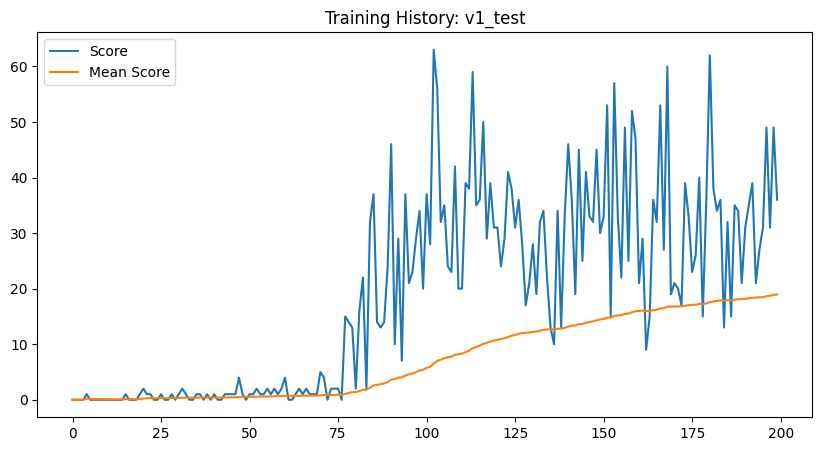

In [6]:
from train import train

agent, scores, means = train(plot_interval=5)

In [8]:
# 2. Run your specific test command
from evaluate import evaluate
print("🚀 Starting Testing Phase...")
evaluate(num_games=10)

🚀 Starting Testing Phase...
🔍 Evaluating Run: v1_test
📂 Loading Model: ./models/dqn_v1_test.pth
✅ Model loaded successfully
📊 Results saved to ./logs/v1_test_metrics.json
   Mean: 35.5 | Max: 65


In [10]:
import os

PROJECT_ROOT = "/content/drive/MyDrive/SnakeAI"
README_PATH = os.path.join(PROJECT_ROOT, "README.md")

readme_content = """
# SnakeAI with Reinforcement Learning

SnakeAI is a project applying **Deep Q-Learning (DQN)** to train an agent to play the classic Snake game.
The agent learns by trial and error, receiving rewards for eating food and penalties for losing.
This repository tracks experiments across versions (V0 baseline, V1 improved run).

---

## 📂 Project Structure
**Core Components & Flow:**

1.  **Snake Game Environment (`src/snake_env.py`):** This defines the rules of the game, how the snake moves, eats food, and when the game ends. It provides the 'state' of the game to the AI and calculates 'rewards' for its actions.
2.  **DQN Agent (`src/agent.py` & `src/model.py`):** This is the brain of the AI.
    *   `model.py` defines a neural network (the Q-Network) that learns to predict the best action to take in any given game state.
    *   `agent.py` manages the agent's behavior: deciding actions (exploration vs. exploitation), storing experiences in a 'replay memory', and using those experiences to train the Q-Network.
3.  **Training (`src/train.py`):** This script runs many games of Snake, allowing the agent to learn through trial and error. It feeds game states, actions, rewards, and next states into the agent's training mechanism.
4.  **Evaluation (`src/evaluate.py`):** After training, this script tests the agent's performance on new games to measure its learned skill.
5.  **Configuration (`configs/dqn_baseline.yaml`):** This file stores all the tunable parameters (hyperparameters) for the DQN agent and training process, making it easy to experiment with different settings.

The overall goal is for the agent to learn a strategy to maximize its score in the Snake game by intelligently deciding which direction to move.

---

## Project Structure for SnakeAI

```
SnakeAI/
├── src/                  # Core Python source code (game logic, agent, training)
│   ├── agent.py          # Implements the DQN agent's logic (model, memory, training steps)
│   ├── model.py          # Defines the neural network architecture for the Q-function
│   ├── snake_env.py      # The Snake game environment (rules, state, rewards)
│   ├── train.py          # Orchestrates the training process for the DQN agent
│   ├── utils.py          # Helper functions (plotting, config loading)
├── models/               # Stores trained PyTorch models (e.g., `dqn_v0_test.pth`)
├── logs/                 # Contains training/evaluation logs and generated graphs
├── configs/              # YAML configuration files for hyperparameters (e.g., `dqn_baseline.yaml`)
└── README.md             # Project overview
```

---

## 🔀 Evolution

- **V0 (Baseline)**: First run, validated environment and agent. Produced `dqn_v0_test.pth`. No README, limited analysis.
- **V1 (Improved Run)**: Added README, experiment naming (`v1_test`), structured configs, metrics JSON, graphs, and clearer pipeline documentation.

---

## ▶️ Usage

```bash
# Train agent with baseline config (V0)
python src/train.py --config configs/dqn_baseline.yaml

# Train agent with V1 config
python src/train.py --config configs/dqn_v1.yaml

# Evaluate trained V1 model
python src/evaluate.py --model models/dqn_v1_test.pth
"""

with open(README_PATH, "w") as f:
    f.write(readme_content)

print(f"✅ README.md created/updated at: {README_PATH}")

✅ README.md created/updated at: /content/drive/MyDrive/SnakeAI/README.md


In [12]:
!pwd

/content/drive/MyDrive/SnakeAI


In [13]:
!git add README.md
!git commit -m "docs: add summarized README with pipeline and version evolution explanation"
!git push origin main

[main 379af23] docs: add summarized README with pipeline and version evolution explanation
 1 file changed, 94 insertions(+)
 create mode 100644 README.md
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 2.28 KiB | 194.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/everi123/SnakeAI_with_RL.git
   e19edad..379af23  main -> main
